In [1]:
from util.pred import multi_predictor as predictor
from cfg import *
import matplotlib.pyplot as plt
from util.processor import *
import matplotlib.patches as mpatches
plt.rcParams['figure.figsize'] = (14,10)

Segmentation Models: using `keras` framework.


In [49]:
MODEL_PATH = './model/multi_100_deeplab_xception_pascal_voc_0930.hdf5'
MODEL_PATH = './model/multi_100_unet_efficientnetb0_imagenet_10062.hdf5'
#MODEL_PATH = './model/multi_100_deeplab_xception_pascal_voc_10091.hdf5'
#MODEL_PATH = './model/multi_100_unet_seresnext101_imagenet_1001.hdf5'
MODEL_PATH = './model/multi_100_unet_efficientnetb0_imagenet_1022_focal.hdf5'
MODEL = MODEL_PATH.split('/')[-1].split('_')[2]
if MODEL=='deeplab':
    WEIGHT='pascal_voc'
else:
    WEIGHT = MODEL_PATH.split('/')[-1].split('_')[4]
MAG = MODEL_PATH.split('/')[-1].split('_')[1]
BACKBONE = MODEL_PATH.split('/')[-1].split('_')[3]


init_params = {
    'MODEL':MODEL,
    'MODEL_PATH':MODEL_PATH,
    'BACKBONE':BACKBONE,
    'WEIGHT':WEIGHT,
    'MAG':int(MAG),
}

In [50]:
wsi_p = predictor(init_params)

In [51]:
import cv2 as cv
import numpy as np
test_slide = TEST_SLIDE_PATHS[5]
test_anno = test_slide[:-4] + 'xml'
print(test_slide,test_anno)
sample_patches_nerve = []

sample_patches_tumor = []

sample_patches_pni = []

sample_patches_normal = []

for fpath in glob.glob(TEST_PATIENT_PATHS[5]+'patch_100_5/mask/*.png'):
    if (fpath.split('.')[0][-1]=='1'):
        sample_patches_tumor.append(fpath)
    elif (fpath.split('.')[0][-1]=='2'):
        sample_patches_nerve.append(fpath)
    elif (fpath.split('.')[0][-1]=='3'):
        sample_patches_pni.append(fpath)
    else:
        sample_patches_normal.append(fpath)
#cv.imread(fpath.replace('mask','image').replace('_p4',''))    
print(len(sample_patches_nerve))
print(len(sample_patches_tumor))
print(len(sample_patches_pni))
print(len(sample_patches_normal))


/data/colon/IS/S15-1841/s15-1841-a4_he_20210730_131629.tiff /data/colon/IS/S15-1841/s15-1841-a4_he_20210730_131629.xml
30
39
10
0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


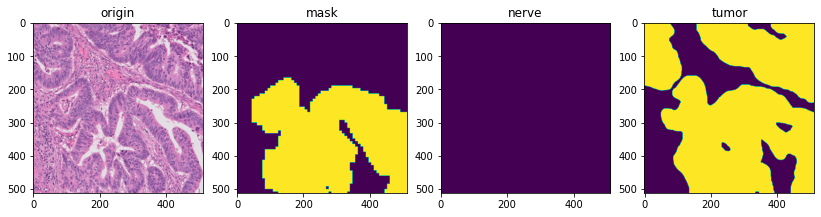

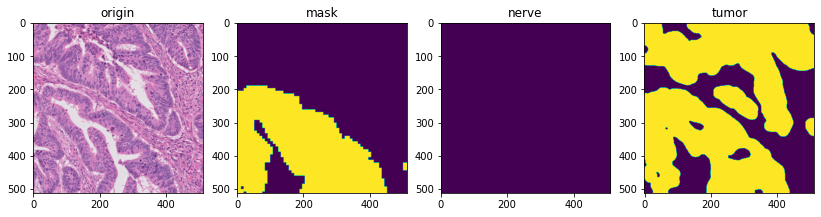

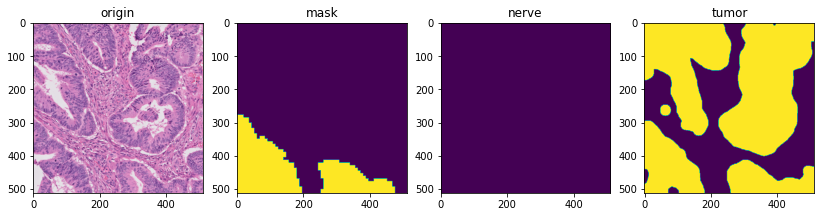

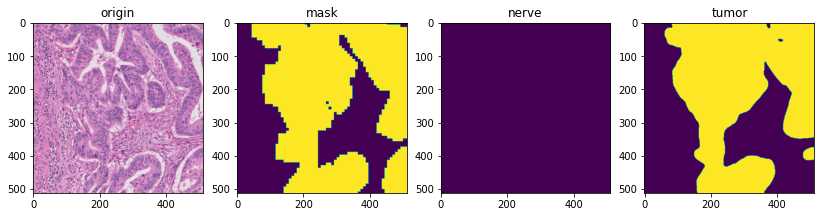

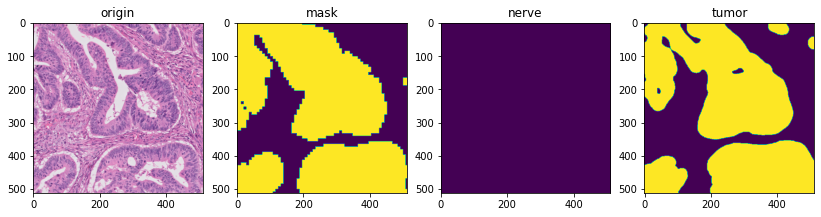

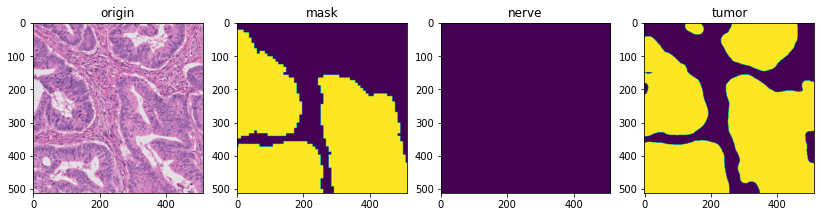

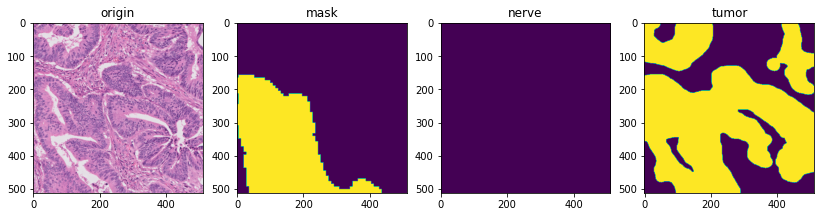

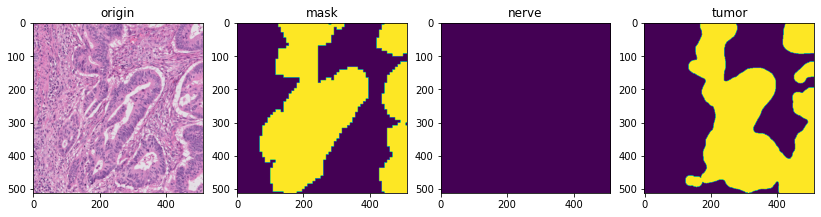

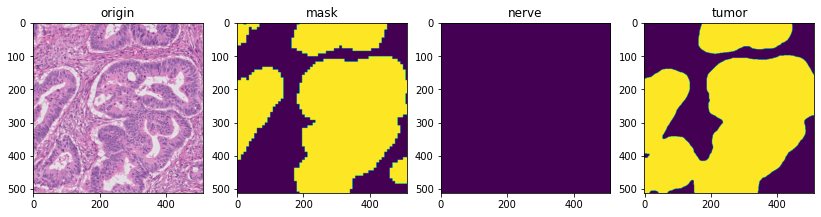

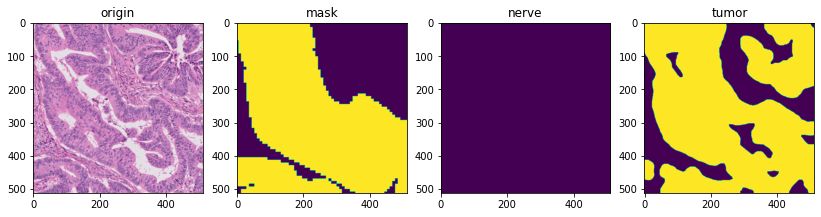

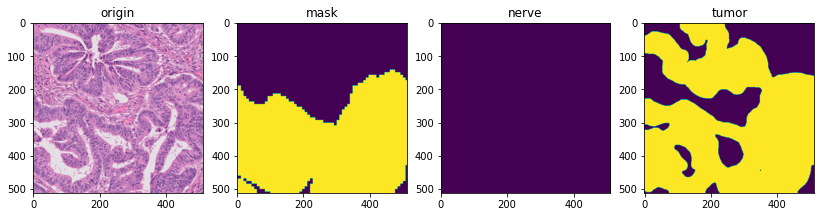

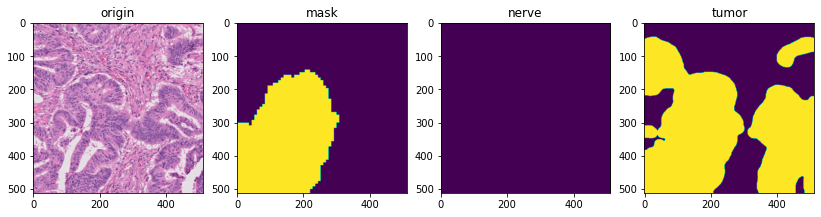

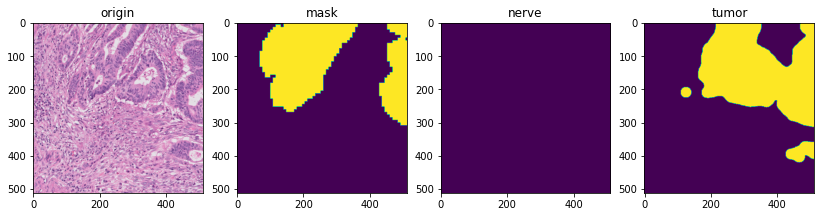

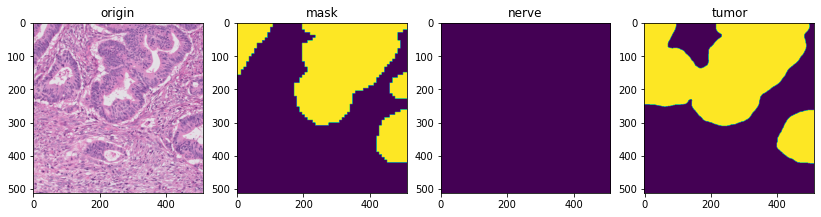

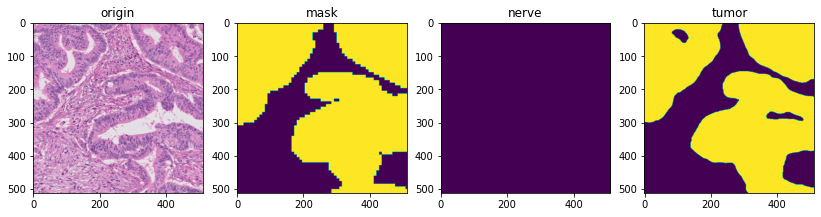

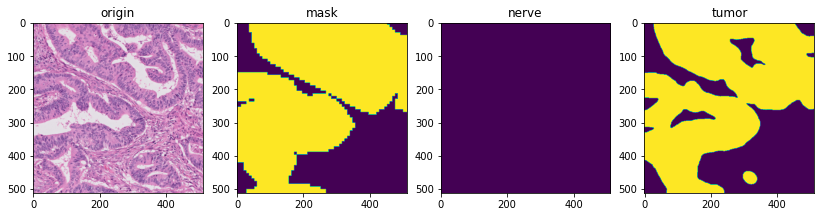

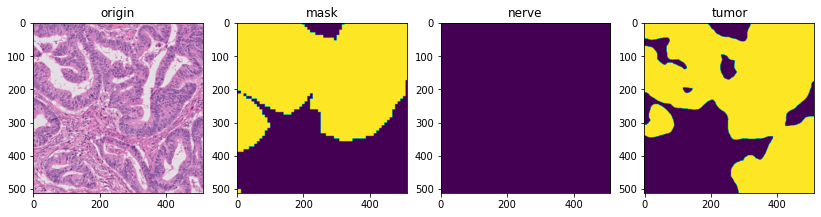

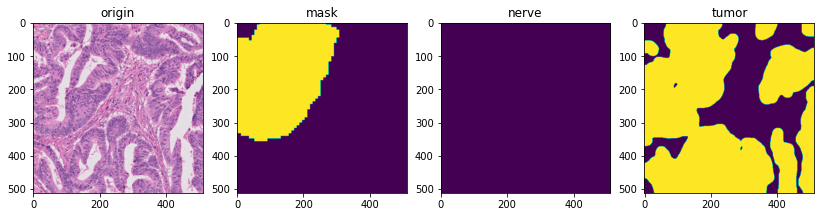

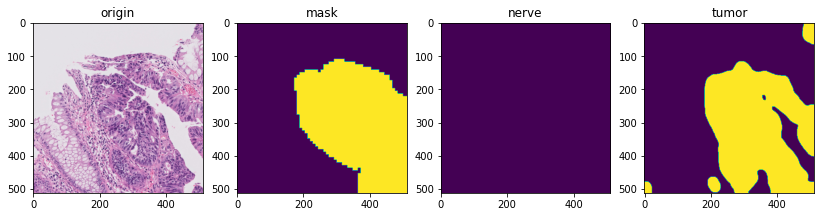

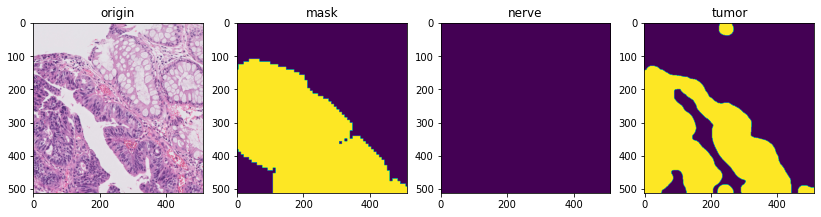

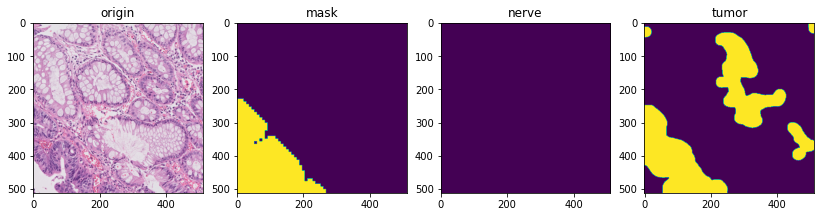

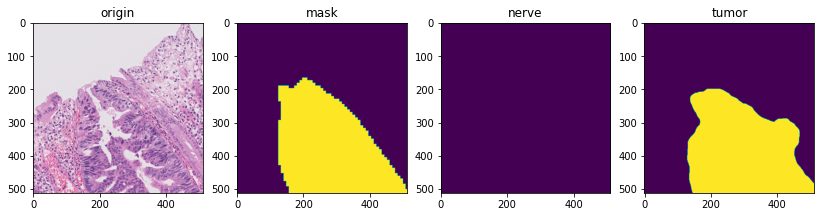

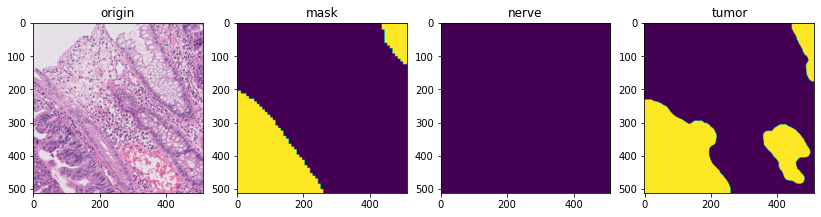

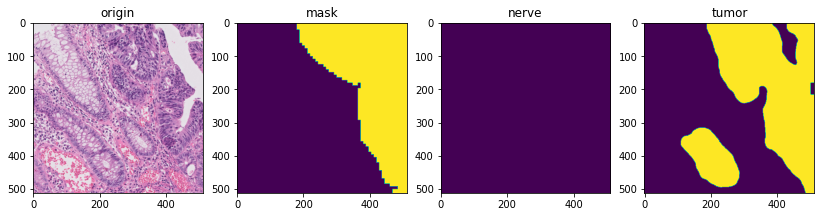

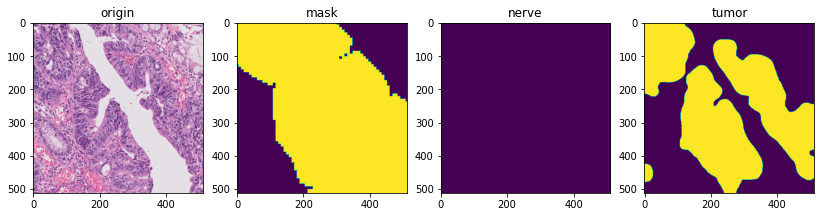

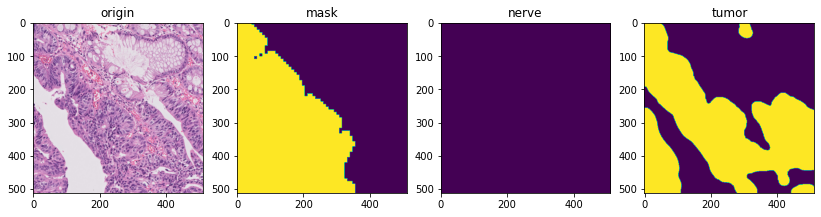

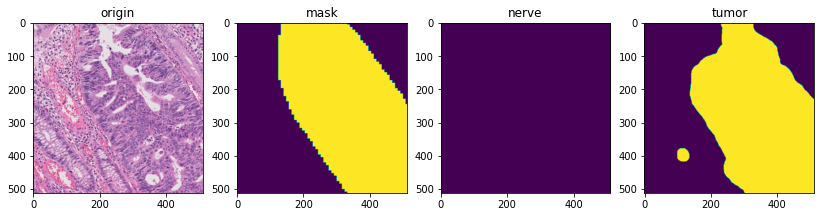

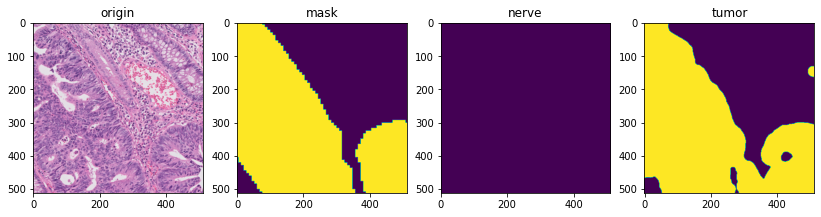

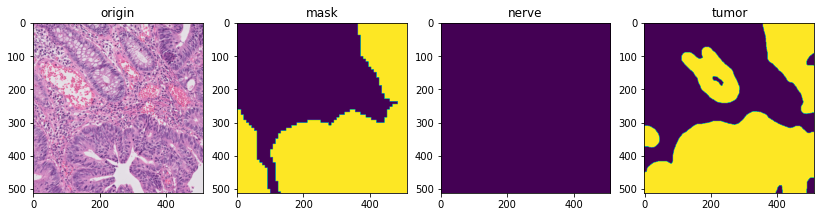

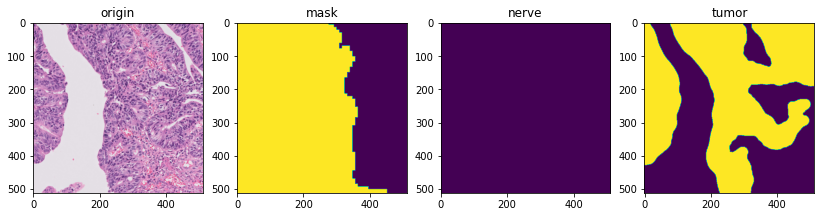

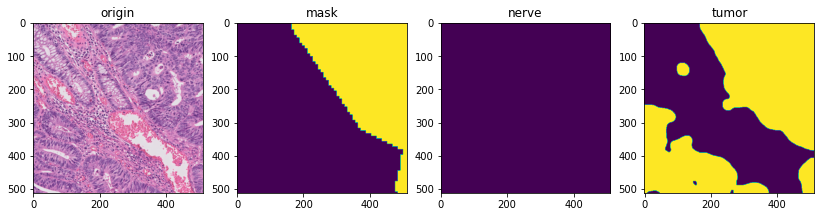

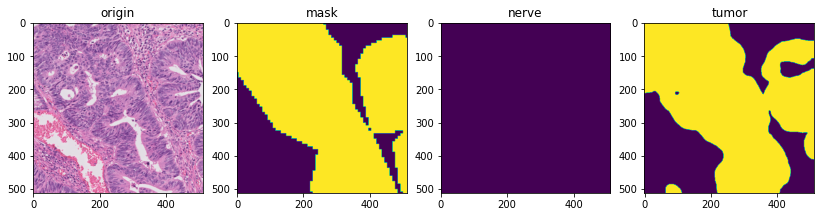

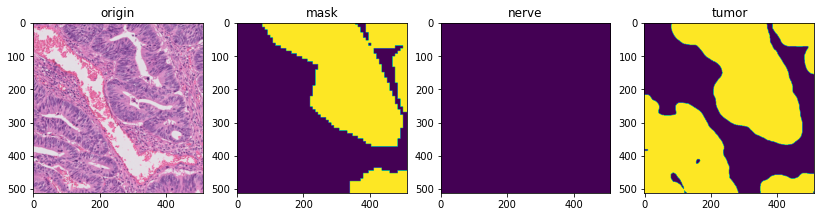

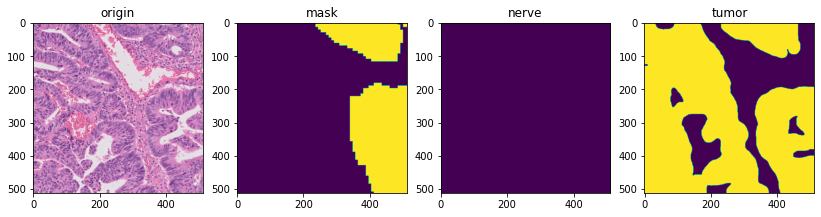

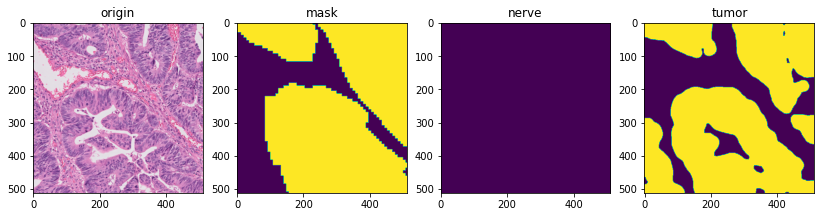

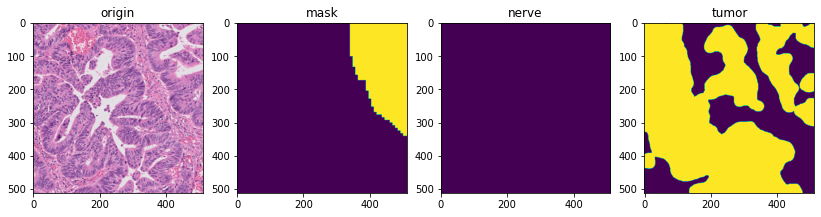

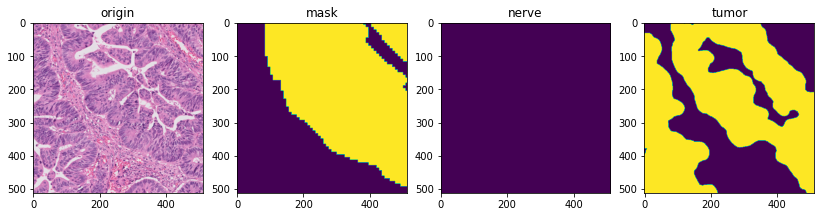

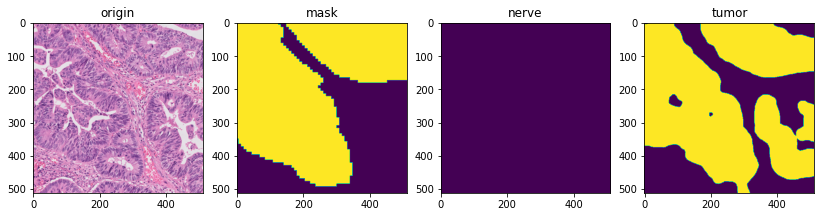

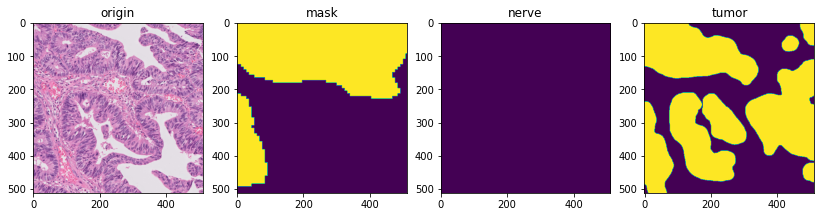

In [5]:
# Sample Tumor Predict
for m_path in sample_patches_tumor:
    img = cv.imread(m_path.replace('mask','image').replace('_p4','').replace('_p3','').replace('_p2','').replace('_p1',''))
    msk = cv.imread(m_path,0)
    nerve_pr,tumor_pr = wsi_p.predict_patch(img)
    plt.figure()
    plt.subplot(1,4,1); plt.title('origin'); plt.imshow(img)
    plt.subplot(1,4,2); plt.title('mask'); plt.imshow(msk)
    plt.subplot(1,4,3); plt.title('nerve');plt.imshow(nerve_pr)
    plt.subplot(1,4,4); plt.title('tumor');plt.imshow(tumor_pr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


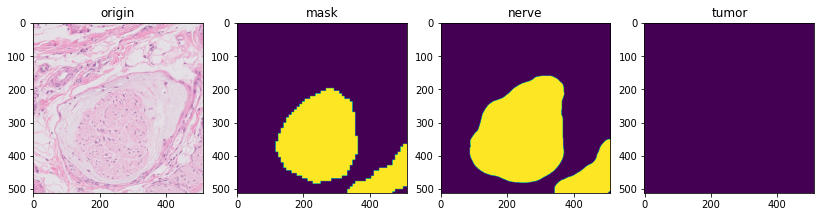

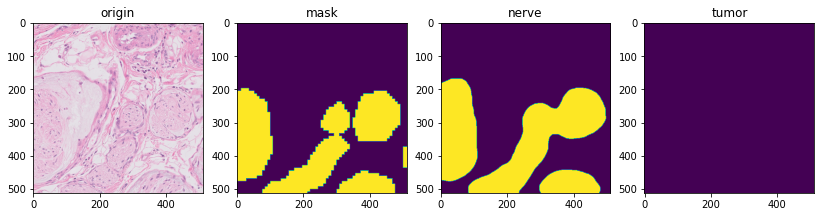

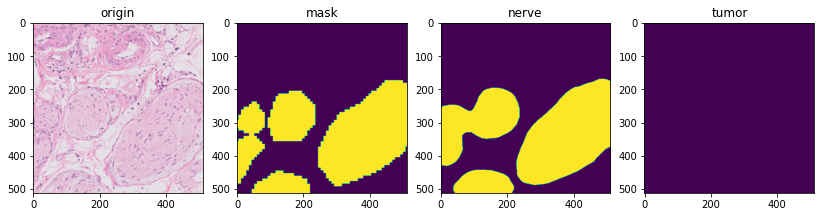

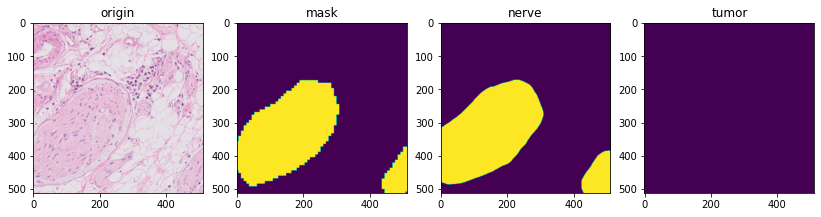

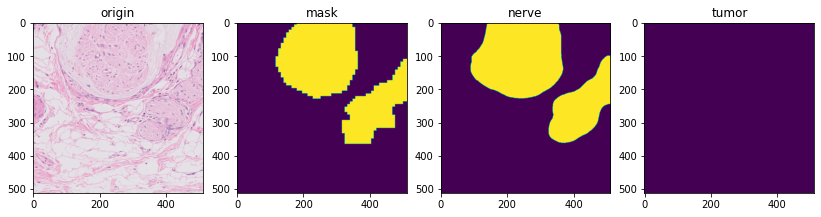

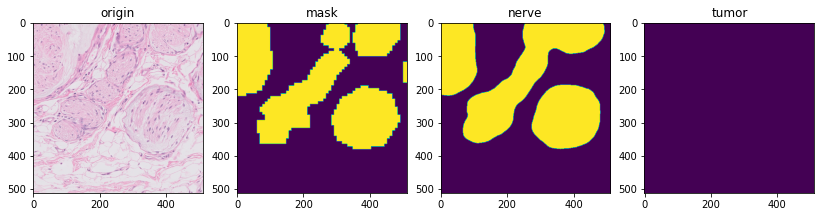

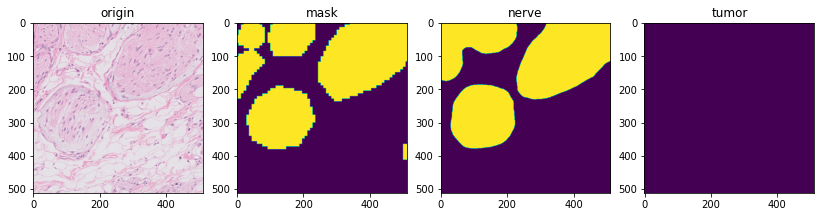

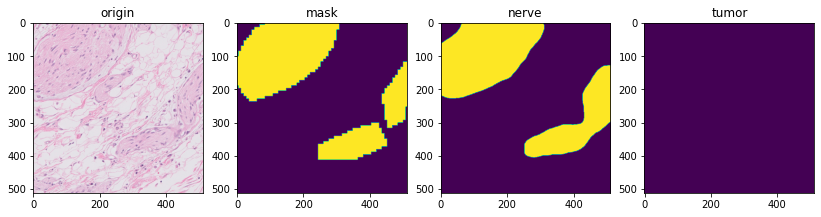

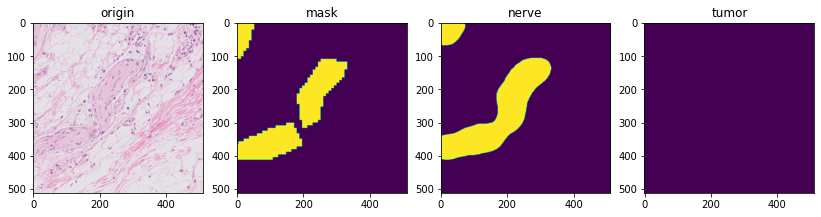

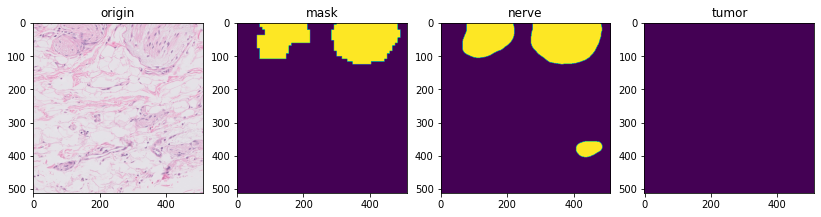

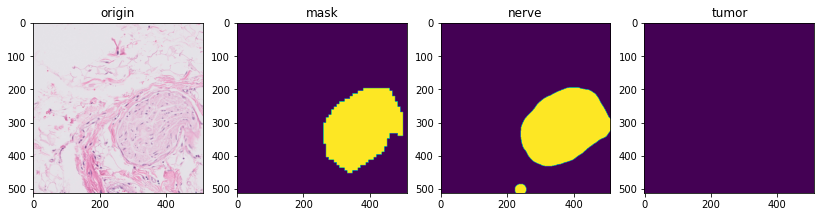

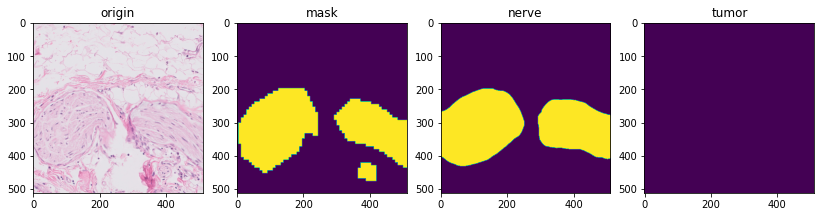

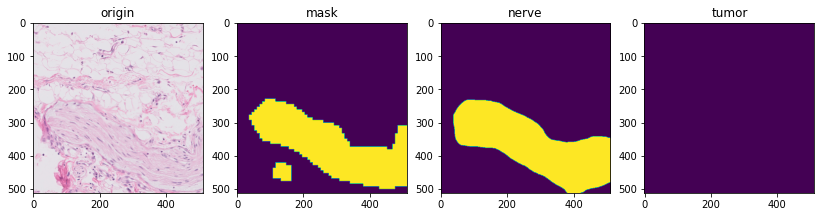

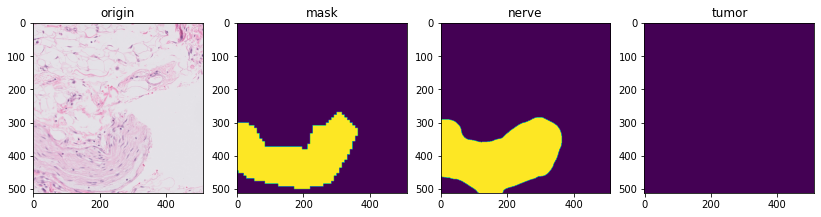

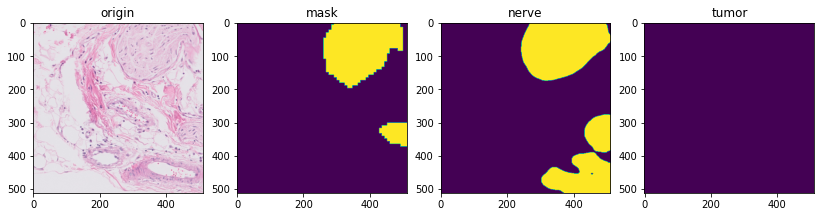

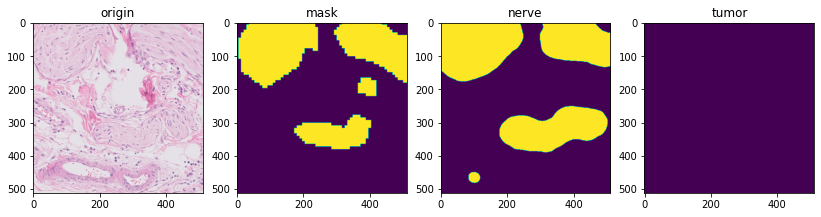

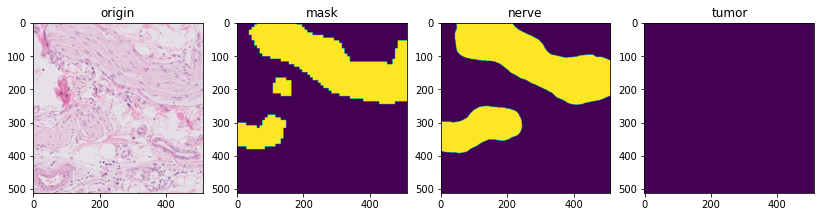

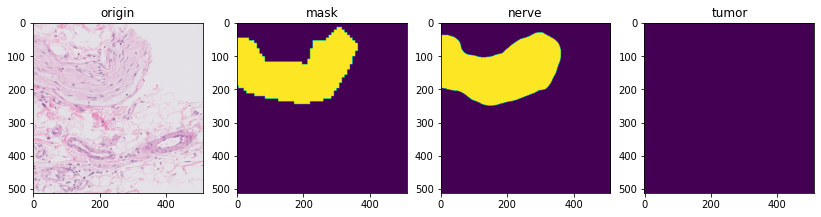

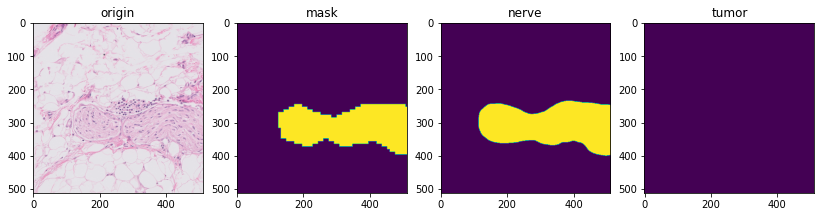

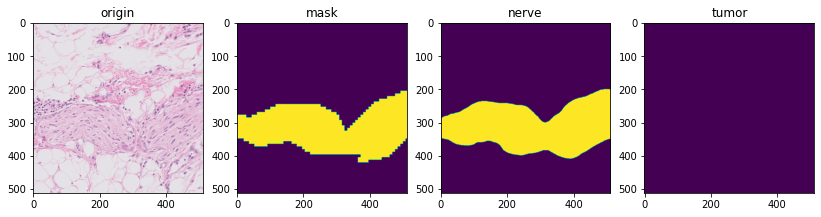

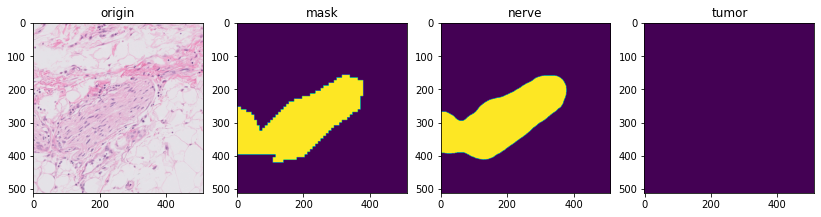

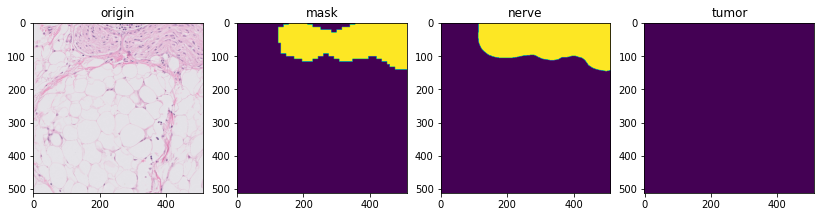

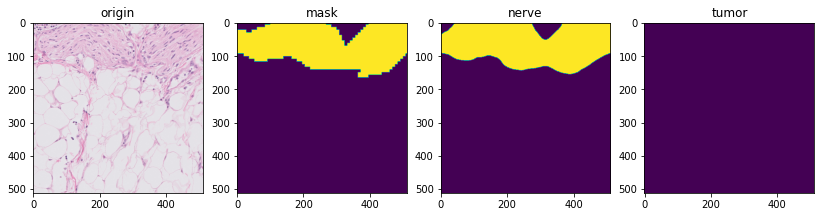

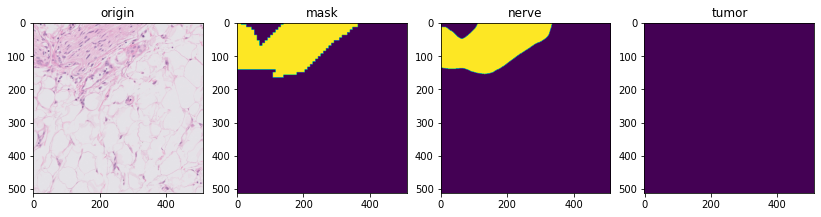

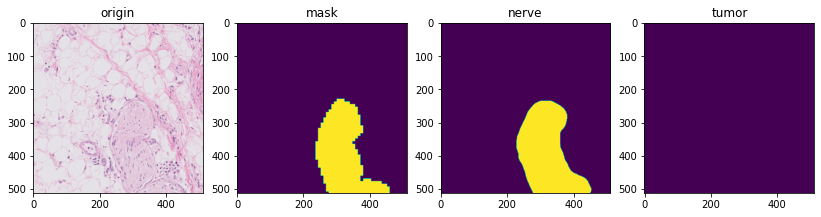

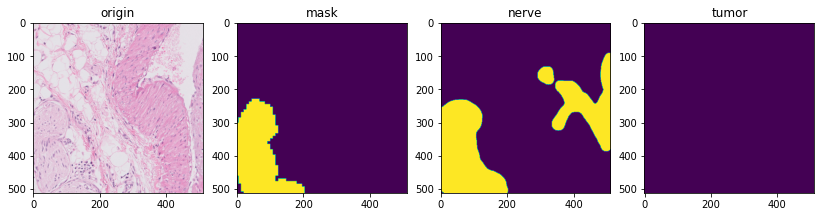

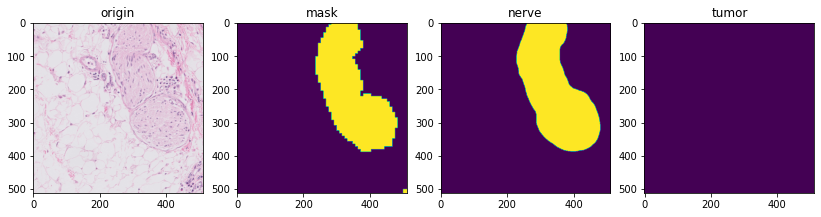

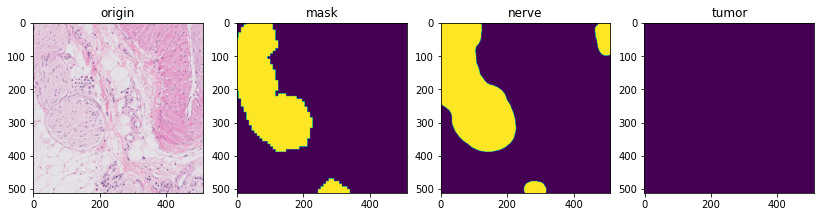

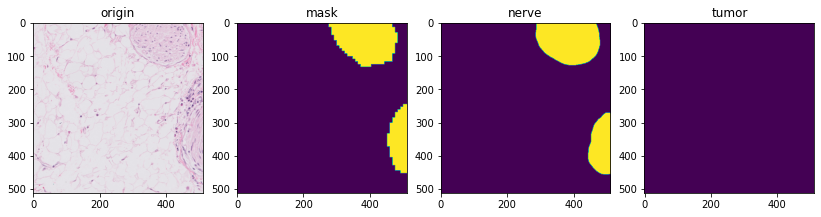

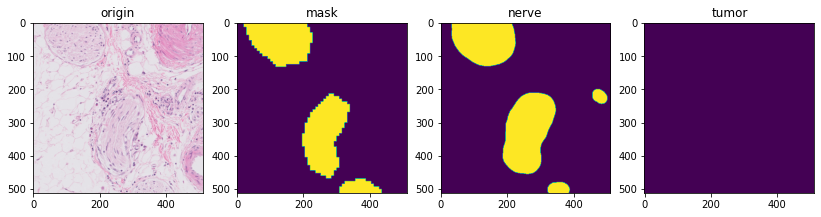

In [6]:
# Sample Nerve Predict
for m_path in sample_patches_nerve:
    img = cv.imread(m_path.replace('mask','image').replace('_p4','').replace('_p3','').replace('_p2','').replace('_p1',''))
    msk = cv.imread(m_path,0)
    nerve_pr,tumor_pr = wsi_p.predict_patch(img)
    plt.figure()
    plt.subplot(1,4,1); plt.title('origin'); plt.imshow(img)
    plt.subplot(1,4,2); plt.title('mask'); plt.imshow(msk)
    plt.subplot(1,4,3); plt.title('nerve');plt.imshow(nerve_pr)
    plt.subplot(1,4,4); plt.title('tumor');plt.imshow(tumor_pr)

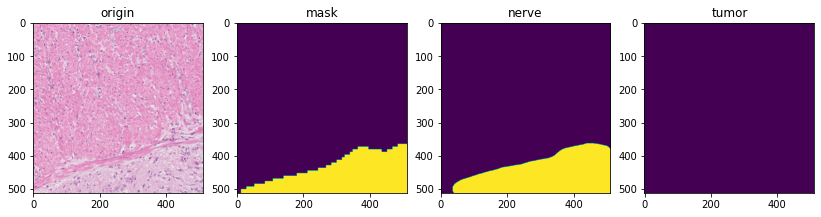

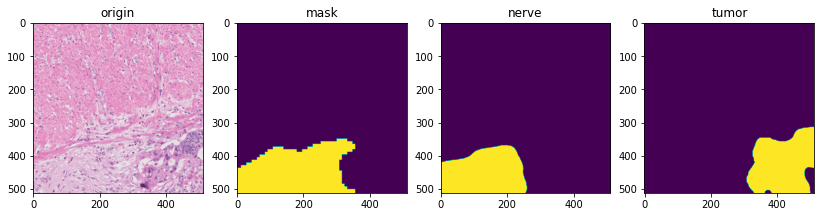

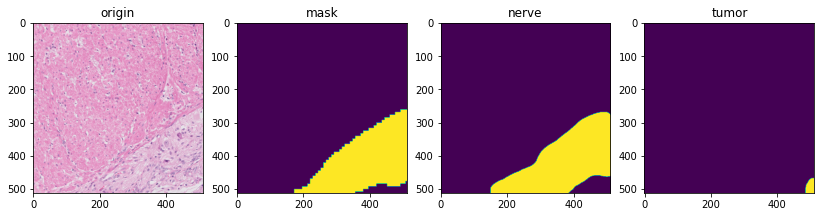

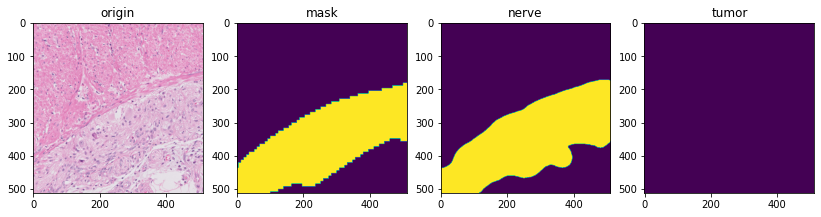

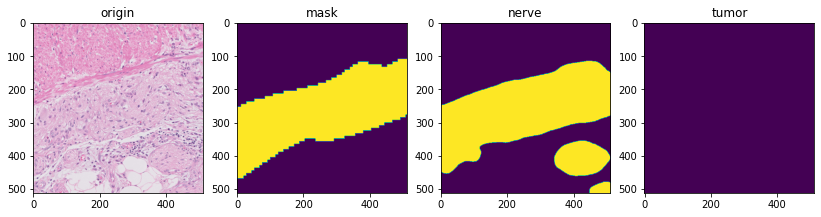

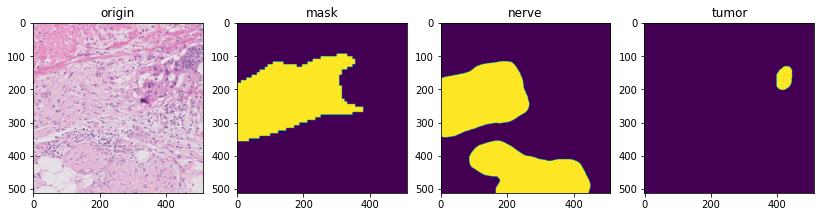

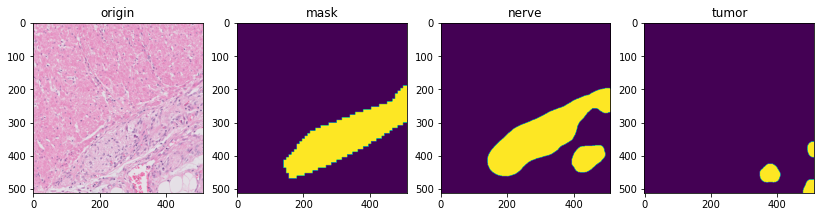

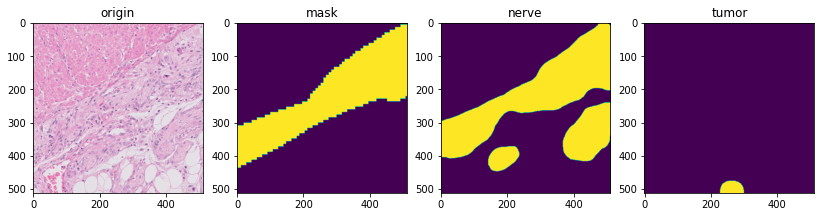

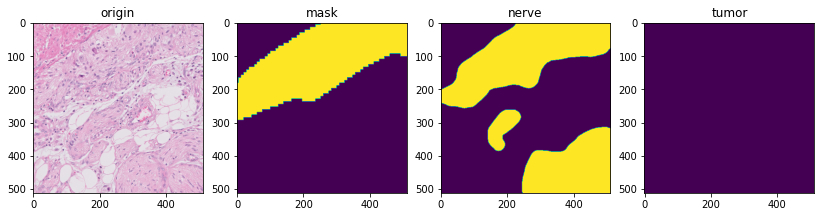

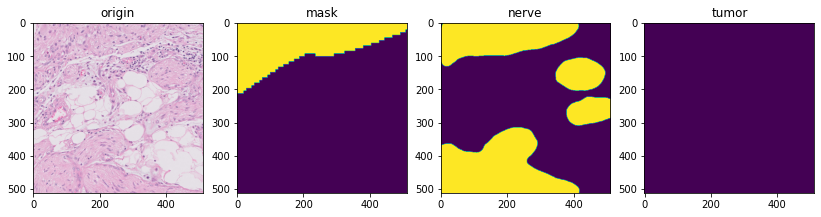

In [7]:
# Sample Pni Predict
for m_path in sample_patches_pni:
    img = cv.imread(m_path.replace('mask','image').replace('_p4','').replace('_p3','').replace('_p2','').replace('_p1',''))
    msk = cv.imread(m_path,0)
    nerve_pr,tumor_pr = wsi_p.predict_patch(img)
    plt.figure()
    plt.subplot(1,4,1); plt.title('origin'); plt.imshow(img)
    plt.subplot(1,4,2); plt.title('mask'); plt.imshow(msk)
    plt.subplot(1,4,3); plt.title('nerve');plt.imshow(nerve_pr)
    plt.subplot(1,4,4); plt.title('tumor');plt.imshow(tumor_pr)

In [45]:
test_slide = TEST_SLIDE_PATHS[3]
test_anno = test_slide[:-4] + 'xml'
level = 4
print(test_slide,test_anno,level)

slide = slide_processor({
    'slide_path':test_slide,
    'xml_path':test_anno,
    'level':level,
    'patch_size':512,
    'patch_name':'patch100'
})

x = slide.get_annotation_dict()
## Show Tumor BBOX
for k in x['bboxes'].keys():
    print(f'{k} : {len(x["bboxes"][k])}')
    
    

/data/colon/IS/S19-19150/s2019-19150-a3_he_20210804_171704.tiff /data/colon/IS/S19-19150/s2019-19150-a3_he_20210804_171704.xml 4
p3 : 4
p1 : 5
p2 : 2


In [46]:
msk, prt = wsi_p.predict_regions(test_slide,test_anno,overlap=0.0,dilate_iter=2,level = level,kernel_size = 4)

100%|██████████| 1/1 [00:00<00:00,  3.70it/s]


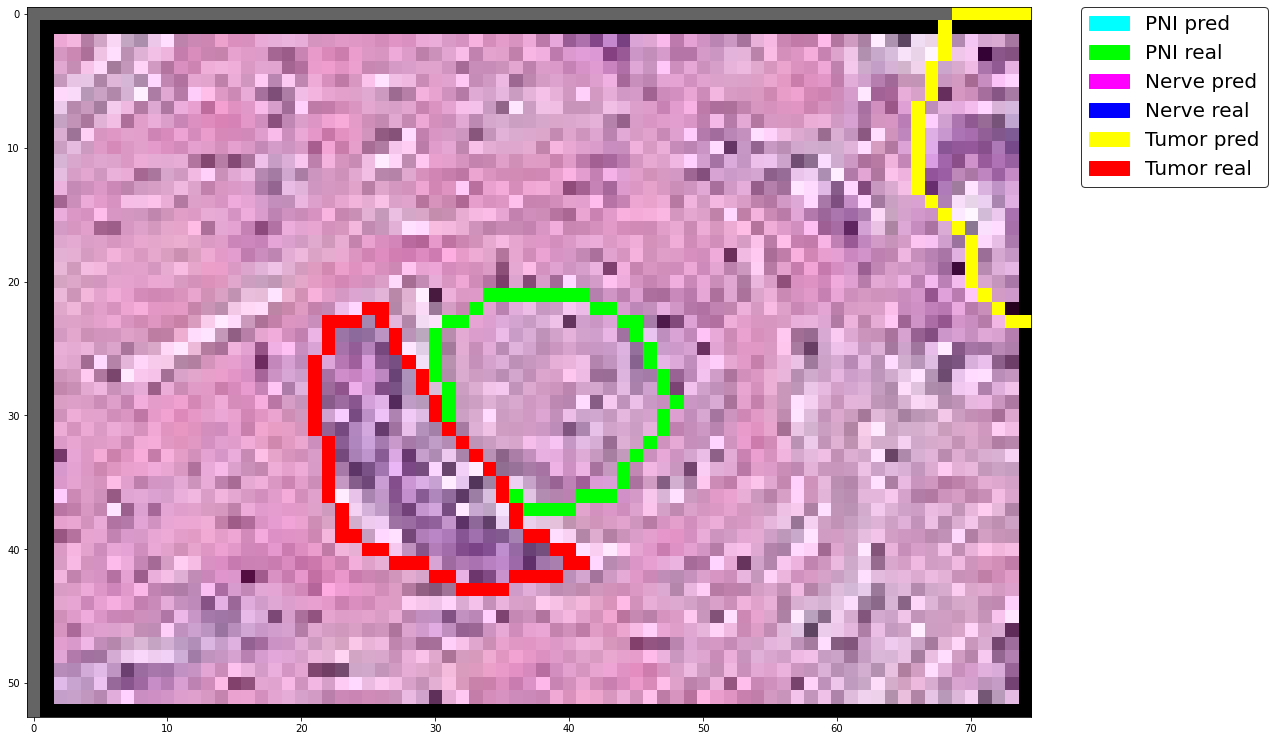

In [47]:
bbox = x['bboxes']['p3'][1]
min_x,min_y = np.min(bbox,axis=0)
max_x,max_y = np.max(bbox,axis=0)
plt.figure(figsize = (18,14))
plt.imshow(prt[min_y:max_y,min_x:max_x])

# Legend
pni_pred_c   = mpatches.Patch(edgecolor = (0,1,1,1),facecolor= (0,1,1,1), label = 'PNI pred'); 
pni_real_c   = mpatches.Patch(edgecolor = (0,1,0,1),facecolor= (0,1,0,1), label = 'PNI real')
nerve_pred_c = mpatches.Patch(edgecolor = (1,0,1,1),facecolor= (1,0,1,1), label = 'Nerve pred'); 
nerve_real_c = mpatches.Patch(edgecolor = (0,0,1,1),facecolor= (0,0,1,1), label = 'Nerve real')
tumor_pred_c = mpatches.Patch(edgecolor = (1,1,0,1),facecolor= (1,1,0,1), label = 'Tumor pred');
tumor_real_c = mpatches.Patch(edgecolor = (1,0,0,1),facecolor= (1,0,0,1), label = 'Tumor real')
legends = [pni_pred_c,pni_real_c,nerve_pred_c,nerve_real_c,tumor_pred_c,tumor_real_c]


plt.legend(handles=legends, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20 ,edgecolor='inherit')

----

In [52]:
save_dir = 'multi_unet_focal_otsu_post_nonoverlap'

In [53]:
import os
tp = 0; fp = 0; fn =0; tn = 0
for slide_path in TEST_SLIDE_PATHS:
    xml_path = slide_path.split('.')[0] + '.xml'
    if os.path.exists(xml_path):
        cfm = wsi_p.eval_regions(slide_path,xml_path,save_dir = save_dir,overlap=0.0,dilate_iter=4,level = 4,kernel_size = 4,save=True)
        tp+=cfm[0]; fp+= cfm[1]; fn+= cfm[2]; tn+=cfm[3]
    else:
        continue
print(f'\nTrue Positive : {tp}\nFalse Positive : {fp}\nFalse Negative : {fn}\nTrue Negative : {tn} ')

100%|██████████| 3/3 [00:04<00:00,  1.60s/it]



True Positive : 16
False Positive : 14
False Negative : 7
True Negative : 73 


In [54]:
import seaborn as sns

In [55]:
cm = np.array([[tp,fn],[fp,tn]])
print(cm)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm)

[[16  7]
 [14 73]]
[[0.69565217 0.30434783]
 [0.16091954 0.83908046]]


In [56]:
sns.set_context(font_scale=2)

Accuracy : 0.809
Precision(PPV) : 0.533
Recall (Sensitivity): 0.696
Specficity : 0.912


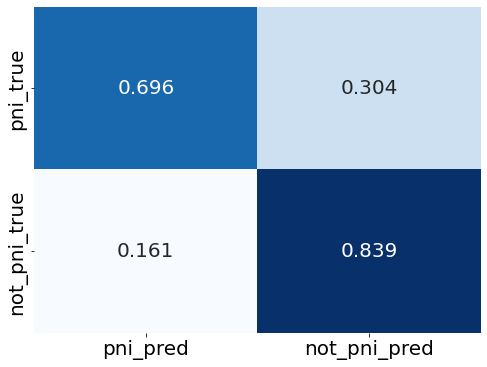

In [57]:
plt.figure(figsize = (8,6))
sns.heatmap(cm,annot=True,cmap='Blues',fmt='.3f',cbar=False,annot_kws={'size':20},
            xticklabels=['pni_pred','not_pni_pred'],
            yticklabels=['pni_true','not_pni_true'],
           )


plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
acc = (tp+tn)/(tp+tn+fp+fn)
prec = tp/(tp+fp)
recl = tp/(tp+fn)
sens = tp/(tp+fp)
spec = tn/(tn+fn)
print(f'Accuracy : {acc:.3f}')
print(f'Precision(PPV) : {prec:.3f}')
print(f'Recall (Sensitivity): {recl:.3f}')
print(f'Specficity : {spec:.3f}')
plt.savefig(os.path.join('/data/colon/IS/',save_dir,'cfm.png'))
